# Daftar Isi <a id='back'></a>

* [Pendahuluan](#intro)

* [Tahap 1. Ikhtisar Data](#data_review)
    * [1.1 Pemeriksaan dataframe train](#datarev_1)
    * [1.2 Pemeriksaan dataframe test](#datarev_2)
    * [1.3 Pemeriksaan dataframe full](#datarev_3)
    * [1.4 Identifikasi kolom yang hilang pada dataframe test](#datarev_4)
    * [1.5 Kesimpulan](#datarev_conclusion)

* [Tahap 2. Pra-pemrosesan data](#data_preprocessing)
    * [2.1 Memverifikasi perhitungan 'rougher output recovery' pada dataframe train](#dataprep_1)
    * [2.2 Menangani missing column pada dataframe test](#dataprep_2)
    * [2.3 Menangani missing values](#dataprep_3)
    * [2.4 Menangani duplicated values](#dataprep_4)
    * [2.5 Kesimpulan](#dataprep_conclusion)    
    
* [Tahap 3. Analisis](#analysis)
    * [3.1 Konsentrat emas (Au), perak (Ag), dan timbal (Pb) mengacu pada stage pemurnian](#analysis_1)
    * [3.2 Distribusi ukuran partikel feed](#analysis_2)
    * [3.3 Total konsentrat seluruh logam di setiap stage yang berbeda](#analysis_3)
    * [3.4 Menangani outlier](#analysis_4)
    * [3.5 Kesimpulan](#analysis_conclusion)

* [Tahap 4. Pengujian](#test)
    * [4.1 Melakukan train model](#test_1)
    * [4.2 Melakukan pengujian final](#test_2)

* [Temuan](#end)

[Kembali ke Daftar Isi](#back)

## Pendahuluan <a id='intro'></a>

Bijih yang ditambang mengalami pemrosesan primer untuk mendapatkan campuran bijih atau feed yang lebih kasar. Hasil dari proses itu digunakan sebagai bahan baku untuk flotasi (alias proses untuk menghasilkan konsentrat yang lebih kasar). Setelah dilakukan flotasi, hasil partikel-partikelnya pun melewati proses pemurnian dua tahap.

1. Flotasi
Campuran bijih emas dimasukkan ke dalam tangki pelampung untuk mendapatkan konsentrat Au dan ekor yang lebih kasar (residu produk dengan tingkat konsentrasi logam berharga yang rendah).
Kestabilan proses ini dipengaruhi oleh volatilitas dan keadaan fisikokimia yang tidak optimal dari pulp flotasi (campuran partikel padat dan cairan).
2. Pemurnian
Konsentrat Au yang lebih kasar mengalami dua tahap pemurnian. Setelah proses pemurnian, kita pun akan memiliki tingkat konsentrasi logam akhir dan ekor baru.

Peneliti perlu menyimulasikan proses perolehan emas dari bijih emas dengan menggunakan rumus berikut untuk menyimulasikan proses perolehan:

Perolehan = ((C * (F - T)) / ((F * (C - T)))) * 100

Dengan keterangan sebagai berikut:
•	C — persentase emas dalam konsentrat tepat setelah proses flotasi (untuk menemukan perolehan konsentrat yang lebih kasar)/setelah dilakukan pemurnian (untuk menemukan perolehan konsentrat akhir)
•	F — persentase emas dalam feed sebelum proses flotasi (untuk menemukan perolehan konsentrat yang lebih kasar)/ dalam konsentrat tepat setelah proses flotasi (untuk menemukan perolehan konsentrat akhir)
•	T — persentase emas dalam ekor yang lebih kasar, tepat setelah proses flotasi (untuk menemukan perolehan konsentrat yang lebih kasar)/setelah dilakukan pemurnian (untuk menemukan perolehan konsentrat akhir)
Untuk memprediksi koefisiennya, kita perlu menemukan persentase emas dalam konsentrat dan ekornya. Perlu diingat bahwa baik konsentrat akhir maupun konsentrat yang lebih kasar sama-sama penting.

Peneliti juga memerlukan metrik yang baru. Metrik tersebut bernama sMAPE (symmetric Mean Absolute Percentage Error) atau kesalahan persentase absolut rata-rata simetris. Metrik sMAPE mirip dengan metrik MAE, hanya saja sMAPE diekspresikan dalam nilai relatif, bukan nilai absolut. Metrik sMAPE disebut simetris karena memperhitungkan skala target maupun prediksi.


### Tujuan: 
Peneliti akan memprediksi konsentrat akhir emas yang diperoleh dari proses pemurnian bijih emas. 


### Tahapan
Peneliti memiliki data yang terdiri dari parameter yang diukur selama proses pemurnian bijih emas seperti konsentrat pada berbagai stage, level tangki pelampung dan lain-lain, dalam *file*:
- /datasets/gold_recovery_train.csv
- /datasets/gold_recovery_test.csv
- /datasets/gold_recovery_full.csv

Tidak ada informasi terkait kualitas data tersebut, jadi perlu dilakukan pemeriksaan terlebih dahulu sebelum melakukan analisis lebih lanjut.

Pertama akan dilakukan evaluasi kualitas data dan melihat apakah terdapat hal yang signifikan yang perlu dilakukan tindak lanjut sebelum dilakukan proses analisis.

Proyek ini akan terdiri dari empat tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data 
 3. Analisis
 4. Pengujian

[Kembali ke Daftar Isi](#back)

## Tahap 1. Ikhtisar Data <a name="data_review"></a>

**Step 1.1**
Melakukan import libraries dan modules yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from numpy.random import RandomState
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

**Step 1.2**
Melakukan load data yang diperlukan dari file *gold_recovery_train.csv*, *gold_recovery_test.csv*, dan *gold_recovery_full.csv* dan menyimpan ke dalam dataframe train, test, dan full.

In [2]:
try:
    train = pd.read_csv('gold_recovery_train.csv', index_col='date')
except:
    train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date')
#membaca gold_recovery_train.csv dan konversi ke dataframe train dengan index kolom date

try:
    test = pd.read_csv('gold_recovery_test.csv', index_col='date')
except:
    test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date')
#membaca gold_recovery_test.csv dan konversi ke dataframe test dengan index kolom date

try:
    full = pd.read_csv('gold_recovery_full.csv', index_col='date')
except:
    full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date')
#membaca gold_recovery_full.csv dan konversi ke dataframe full dengan index kolom date

### Pemeriksaan dataframe train <a name="datarev_1"></a>

**Step 1.3**
Melakukan pemeriksaan terhadap dataframe train.

In [3]:
train.head() #melihat 5 baris awal dataframe train

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train.info() #informasi umum tentang dataframe train

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                             

In [5]:
print(f'{train.isna().sum().head(60)}\n{train.isna().sum().tail(26)}')
#memeriksa detail missing value pada dataframe train

final.output.concentrate_ag                             72
final.output.concentrate_pb                             72
final.output.concentrate_sol                           370
final.output.concentrate_au                             71
final.output.recovery                                 1521
final.output.tail_ag                                    66
final.output.tail_pb                                   183
final.output.tail_sol                                  145
final.output.tail_au                                    66
primary_cleaner.input.sulfate                         1307
primary_cleaner.input.depressant                      1262
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         985
primary_cleaner.output.concentrate_ag                   82
primary_cleaner.output.concentrate_pb                  358
primary_cleaner.output.concentrate_sol                 636
primary_cleaner.output.concentrate_au                   

In [6]:
train.duplicated().sum()
#memeriksa duplicated value pada dataframe train

16

Terdapat missing values dan duplicated values pada dataframe train yang akan diolah lebih lanjut.

### Pemeriksaan dataframe test <a name="datarev_2"></a>

**Step 1.4**
Melakukan pemeriksaan terhadap dataframe test.

In [7]:
test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 non-null

In [9]:
test.isna().sum().head(52)

primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257
rougher.input.floatbank10_xanthate            123


In [10]:
test.duplicated().sum()

6

Terdapat indikasi missing columns dan juga missing values serta duplicated values pada dataframe test yang akan diolah lebih lanjut.

### Pemeriksaan dataframe full <a name="datarev_3"></a>

**Step 1.5**
Melakukan pemeriksaan terhadap dataframe full.

In [11]:
full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [12]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                             

In [13]:
print(f'{full.isna().sum().head(60)}\n {full.isna().sum().tail(26)}')

final.output.concentrate_ag                             89
final.output.concentrate_pb                             87
final.output.concentrate_sol                           385
final.output.concentrate_au                             86
final.output.recovery                                 1963
final.output.tail_ag                                    83
final.output.tail_pb                                   200
final.output.tail_sol                                  271
final.output.tail_au                                    81
primary_cleaner.input.sulfate                         1609
primary_cleaner.input.depressant                      1546
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                        1151
primary_cleaner.output.concentrate_ag                   98
primary_cleaner.output.concentrate_pb                  448
primary_cleaner.output.concentrate_sol                 798
primary_cleaner.output.concentrate_au                   

In [14]:
full.duplicated().sum()

22

Terdapat missing values dan duplicated values pada dataframe full yang akan diolah lebih lanjut.

### Identifikasi kolom yang hilang pada dataframe test <a name="datarev_4"></a>

**Step 1.6**
Membandingkan kolom set full dengan kolom set test dan mendeteksi kekurangannya.

In [18]:
df_tempfull=pd.DataFrame() #membuat dataframe sementara
for col in list(full.columns):#loop melalui list kolom set full
    if col not in list(test.columns):#jika kolom tidak ditemukan pada set test
        df_tempfull[col]=full[col]#menambahkan kolom dari set full set ke dataframe sementara
        
df_tempfull.info()#informasi umum terkait dataframe sementara

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                             

In [19]:
df_tempfull.shape

(22716, 34)

Dataframe test kekurangan 34 kolom, di mana kolom-kolom tersebut terdiri dari 13 item dari stage rougher, 8 item dari stage primary cleaner, 4 item dari stage secondary cleaner, dan 9 item dari stage final.

### Kesimpulan <a name="datarev_conclusion"></a>

Data type kolom pada dataframe train, test, dan full telah sesuai. Selanjutnya terdapat kekuarangan kolom yang diperlukan pada dataframe test yang terdiri dari 13 item dari stage rougher, 8 item dari stage primary cleaner, 4 item dari stage secondary cleaner, dan 9 item dari stage final. Kemudian juga terdapat missing value dan duplicated value pada ketiga dataframe yang perlu ditindaklanjuti sebelum dilakukan analisis lebih lanjut.

[Kembali ke Daftar Isi](#back)

## Tahap 2. Pra-pemrosesan Data <a id='data_preprocessing'></a>

### Memverifikasi perhitungan 'rougher output recovery' pada dataframe train <a id='dataprep_1'></a>

**Step 2.1**
Melakukan pembersihan null dalam dataframe train untuk melakukan verifikasi menggunakan rumus  yang telah diberikan pada deskripsi proyek.

In [15]:
train_nnull = train.dropna() #menghapus seluruh null values dari train
train_nnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11017 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         11017 non-null  float64
 1   final.output.concentrate_pb                         11017 non-null  float64
 2   final.output.concentrate_sol                        11017 non-null  float64
 3   final.output.concentrate_au                         11017 non-null  float64
 4   final.output.recovery                               11017 non-null  float64
 5   final.output.tail_ag                                11017 non-null  float64
 6   final.output.tail_pb                                11017 non-null  float64
 7   final.output.tail_sol                               11017 non-null  float64
 8   final.output.tail_au                             

**Step 2.2**
Melakukan kalkulasi menggunakan rumus yang terdapat dalam deskripsi proyek [((C * (F - T)) / ((F * (C - T)))) * 100] dan membandingkannya dengan kolom rougher.output.recovery existing pada dataframe.

In [16]:
C = train_nnull['rougher.output.concentrate_au']
F = train_nnull['rougher.input.feed_au']
T = train_nnull['rougher.output.tail_au']
train_nnull['recovery'] = ((C * (F - T)) / ((F * (C - T)))) * 100
display(train_nnull['recovery'].head())
display(train_nnull['rougher.output.recovery'].head())

C:\Users\Luqmanulhakim\AppData\Local\Temp\ipykernel_33160\247968824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_nnull['recovery'] = ((C * (F - T)) / ((F * (C - T)))) * 100


date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: recovery, dtype: float64

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: rougher.output.recovery, dtype: float64

**Step 2.3**
Melakukan kalkulasi Mean Absolute Error (MAE) terhadap hasil perhitungan di atas dengan kolom recovery existing.

In [17]:
MAE = np.sum(np.abs(train_nnull['recovery'] - train_nnull['rougher.output.recovery']))/\
len(train_nnull['rougher.output.recovery'])
print(MAE)

9.460144184559453e-15


Nilai MAE dapat diabaikan karena sangat tidak signifikan. Jadi kita dapat menyimpulkan bahwa nilai rougher.output.recovery sudah benar.

### Menangani missing column pada dataframe test<a id='dataprep_2'></a>

**Step 2.4**
Menindaklanjuti missing column pada dataframe test. Untuk mengisi missing column, telah tersedia data yang didapat pada proses sebelumnya yakni df_tempfull

In [20]:
test = test.merge(df_tempfull, on = 'date')
test.shape

(5856, 86)

**Step 2.5**
Menyamakan urutan column pada set train, set test, dan set full, untuk proses analisis selanjutnya.

In [21]:
train = train.reindex(columns=sorted(train.columns))
test = test.reindex(columns=sorted(test.columns))
full = full.reindex(columns=sorted(full.columns))

In [22]:
print(f'{train.info()} {test.info()} {full.info()}')

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_au                         16789 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_au                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                            

### Menangani missing values <a id='dataprep_3'></a>

**Step 2.6**
Menindaklanjuti missing value pada seluruh set data yang akan digunakan. Untuk mengisi missing value, kita akan menggunakan metode forward fills karena nilai fitur yang berurutan secara waktu memiliki kecenderungan nilai yang tidak jauh berbeda.

In [23]:
#menggunakan metode forward fills untuk missing values
train = train.fillna(method='ffill', axis=0) 
test = test.fillna(method='ffill', axis=0)
full = full.fillna(method='ffill', axis=0)

In [24]:
print(f'{train.isna().sum().head(60)}\n{train.isna().sum().tail(26)}\n\n \
        {test.isna().sum().head(60)}\n{test.isna().sum().tail(26)}\n\n \
        {full.isna().sum().head(60)}\n{full.isna().sum().tail(26)}')

final.output.concentrate_ag                           0
final.output.concentrate_au                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_au                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_au                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.tail_ag                  

### Menangani duplicated values <a id='dataprep_4'></a>

**Step 2.7**
Menindaklanjuti duplicated value pada seluruh set data yang akan digunakan.

In [25]:
train = train.drop_duplicates() 
test = test.drop_duplicates() 
full = full.drop_duplicates()

print(f'{train.duplicated().sum()},{test.duplicated().sum()},{test.duplicated().sum()}')

0,0,0


### Kesimpulan <a name="dataprep_conclusion"></a>

Kita telah melakukan kalkulasi menggunakan rumus yang terdapat dalam deskripsi proyek [((C * (F - T)) / ((F * (C - T)))) * 100] dan membandingkannya dengan kolom rougher.output.recovery existing pada dataframe, kemudian dilanjutkan dengan menghitung nilai Mean Absolute Error (MAE). Hasil nilai MAE sangat tidak signifikan sehingga dapat diabaikan, dengan kata lain kita dapat menyimpulkan bahwa nilai rougher.output.recovery sudah benar.

Kita telah melengkapi kolom yang hilang dalam dataframe test dan telah menyamakan urutan kolom untuk ketiga dataframe untuk pengolahan lebih lanjut.

Kita juga telah menangani missing values dan duplicated values yang ada di ketiga dataframe tersebut.

[Kembali ke Daftar Isi](#back)

## Tahap 3. Analisis <a name="analysis"></a>

### Konsentrat emas (Au), perak (Ag), dan timbal (Pb) mengacu pada stage pemurnian <a name="analysis_1"></a>

**Step 3.1**
Membuat grafik histogram untuk menampilkan konsentrat emas (Au) di setiap stage pemurnian.

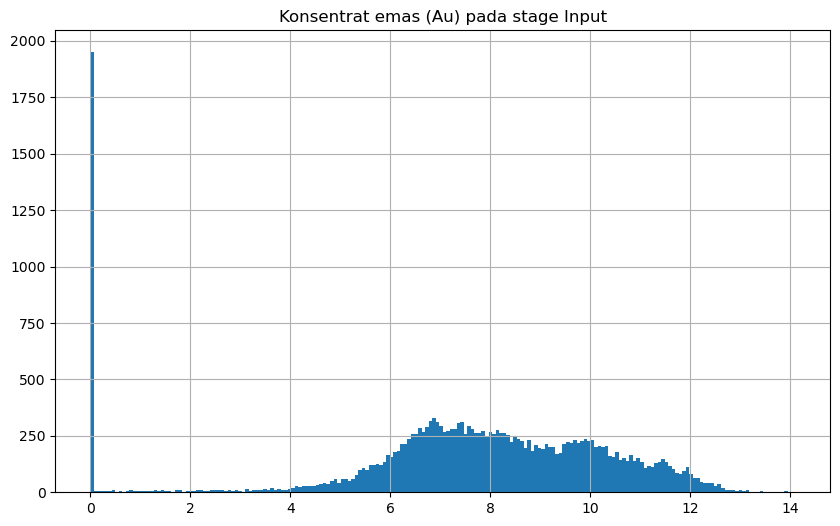

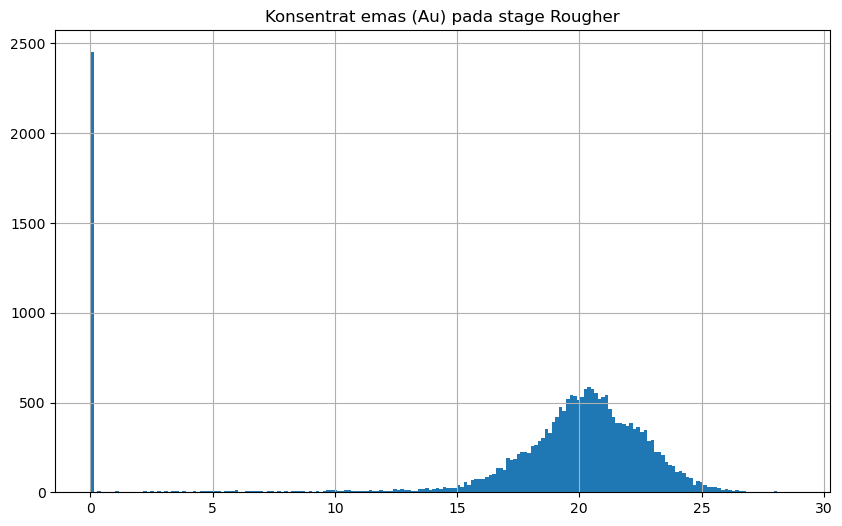

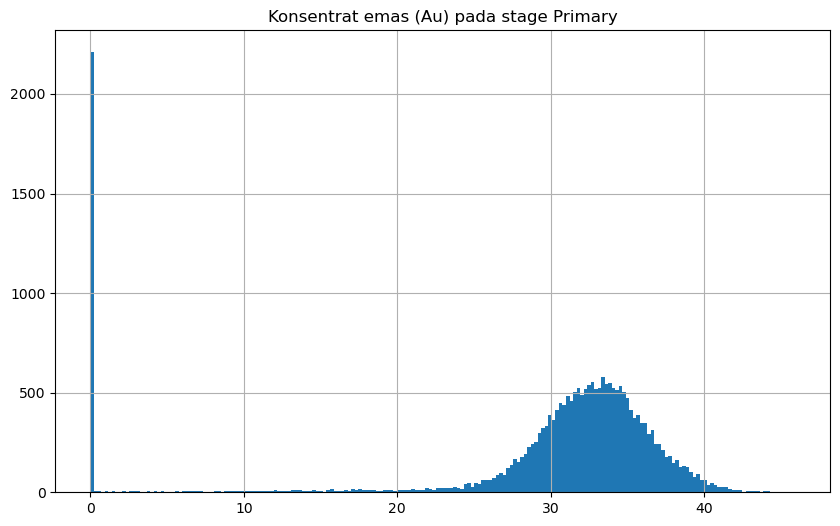

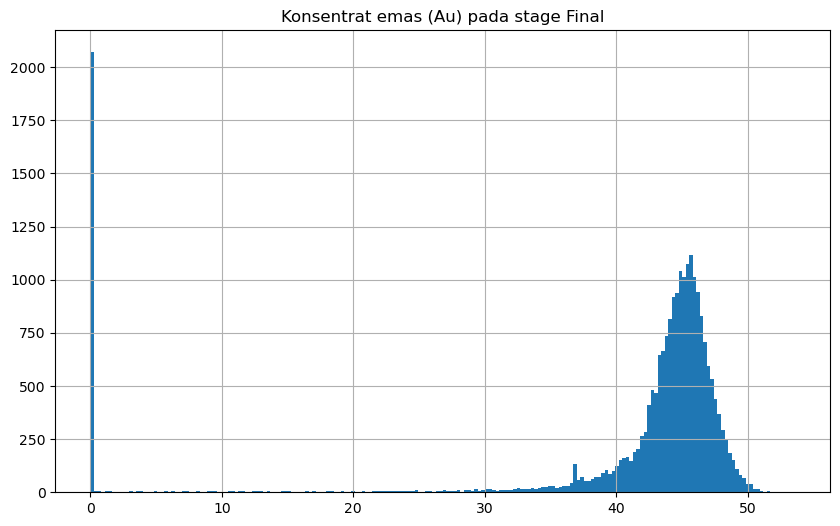

In [26]:
au_inputs = [('rougher.input.feed_au', 'Input'), ('rougher.output.concentrate_au', 'Rougher') \
          ,('primary_cleaner.output.concentrate_au', 'Primary'), ('final.output.concentrate_au', 'Final')]
#membuat list input untuk diproses pada loop
for i in au_inputs:#loop melalui list
    full[i[0]].hist(bins=200, figsize=(10, 6))#membentuk grafik histogram
    plt.title('Konsentrat emas (Au) pada stage {}'.format(i[1]))#memberikan judul grafik
    plt.show()#menampilkan grafik

Konsentrat emas mencapai nilai tertinggi pada stage final dan hal ini sangat rasional. Konsentrat menurun saat kita kembali ke stage input. Sebagai catatan tambahan, kita menemukan banyak nilai nol di setiap stage.

**Step 3.2**
Membuat grafik histogram untuk menampilkan konsentrat perak (Ag) di setiap stage pemurnian.

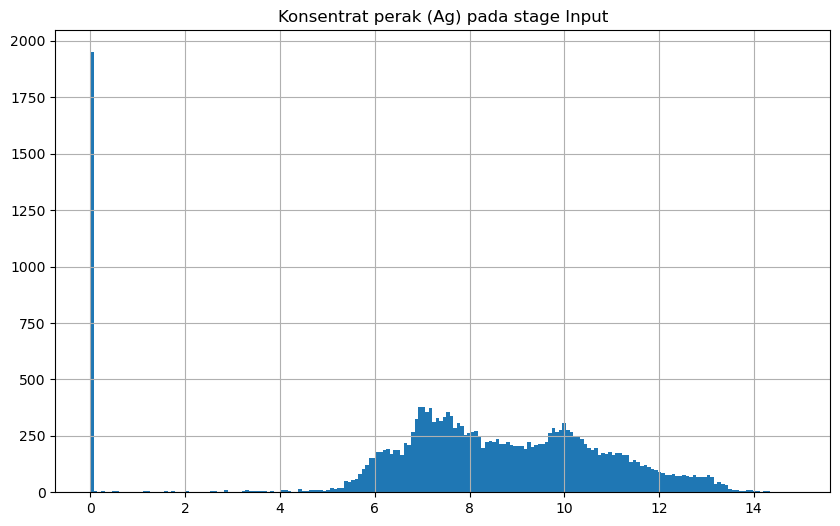

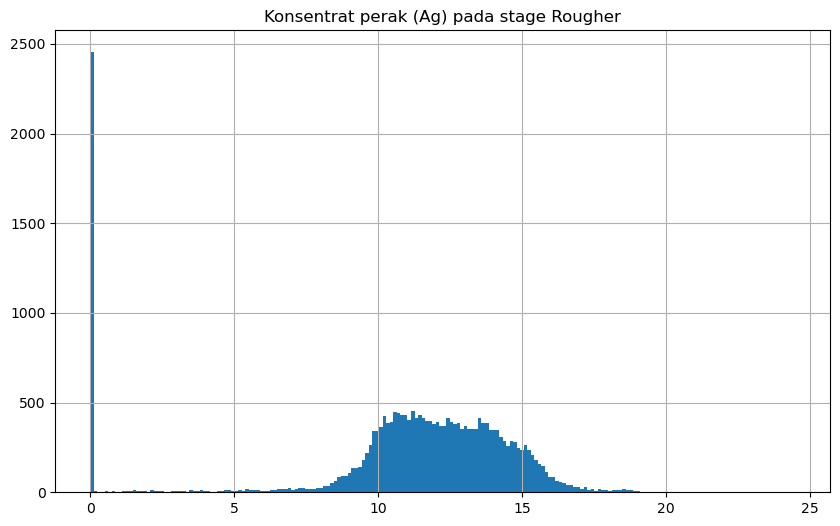

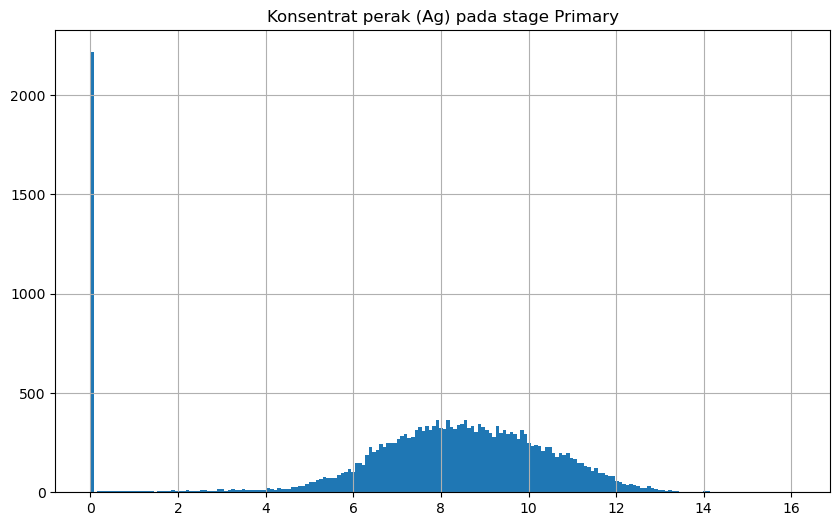

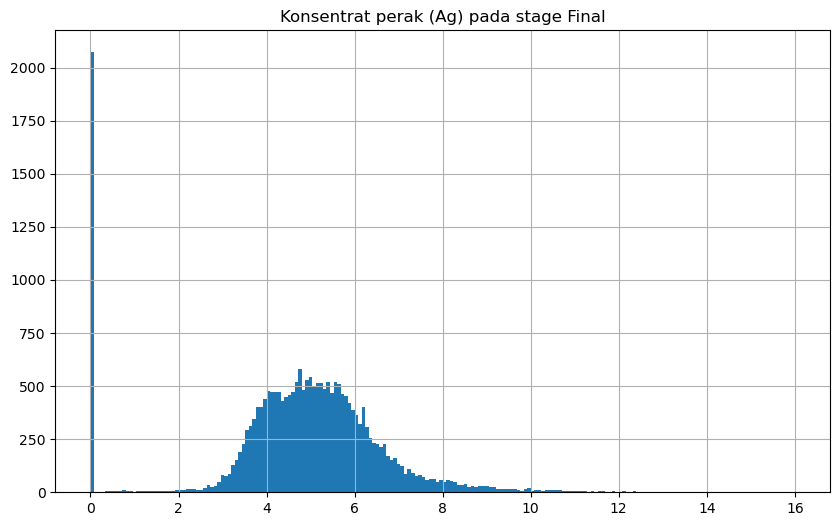

In [27]:
ag_inputs = [('rougher.input.feed_ag', 'Input'), ('rougher.output.concentrate_ag', 'Rougher') \
          ,('primary_cleaner.output.concentrate_ag', 'Primary'), ('final.output.concentrate_ag', 'Final')]
for i in ag_inputs:
    full[i[0]].hist(bins=200, figsize=(10, 6))
    plt.title('Konsentrat perak (Ag) pada stage {}'.format(i[1]))
    plt.show()

Konsentrasi perak lebih tinggi pada stage final, diikuti oleh stage rougher, stage primary cleaner, dan stage input. Di sini juga ditemukan banyak nilai nol.

**Step 3.3**
Membuat grafik histogram untuk menampilkan konsentrat timbal (Pb) di setiap stage pemurnian.

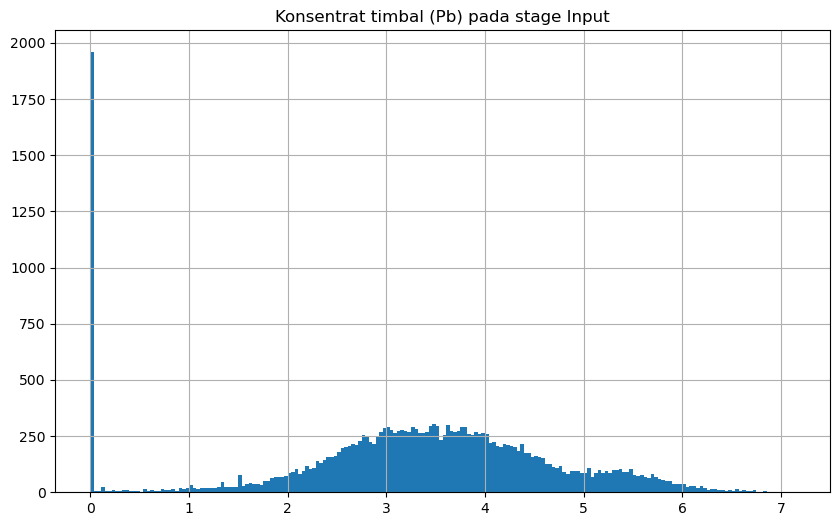

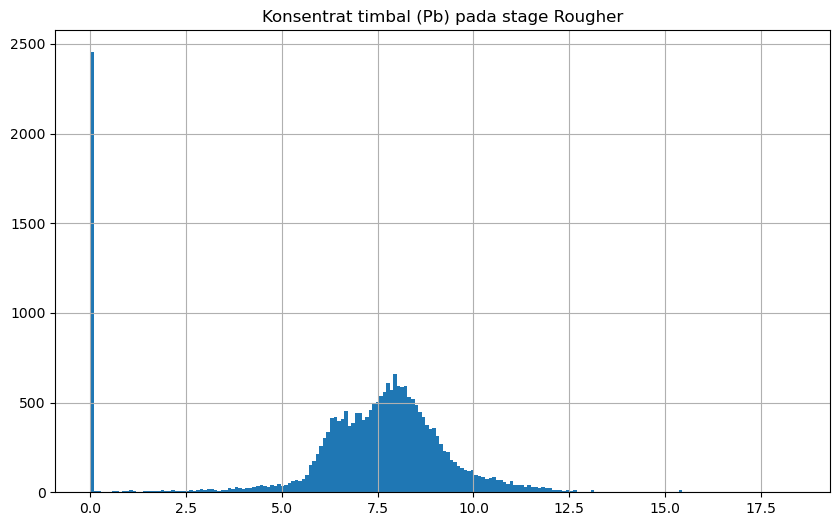

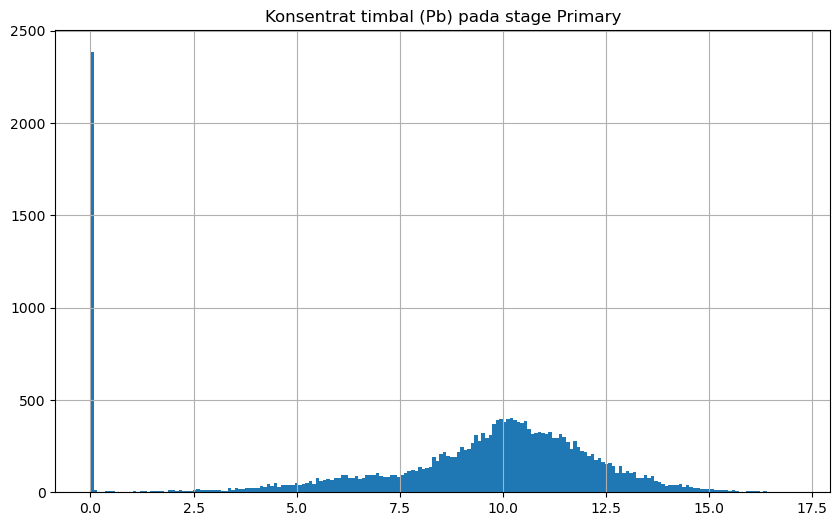

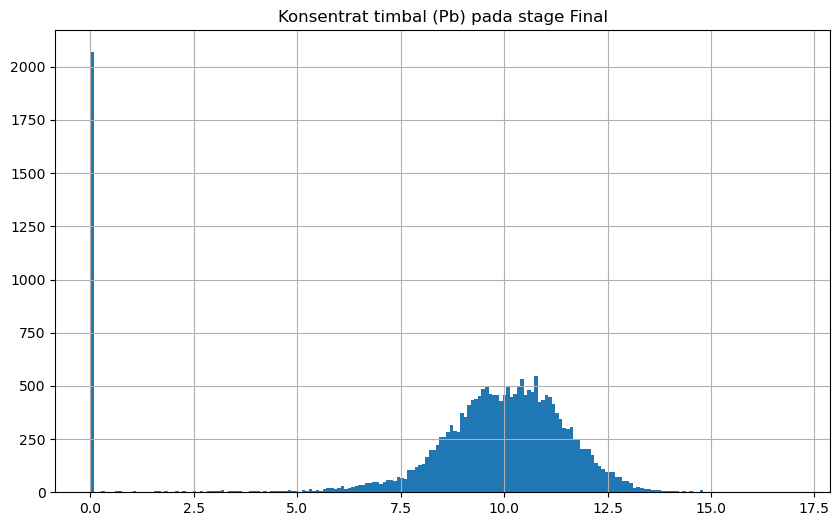

In [28]:
pb_inputs = [('rougher.input.feed_pb', 'Input'), ('rougher.output.concentrate_pb', 'Rougher') \
          ,('primary_cleaner.output.concentrate_pb', 'Primary'), ('final.output.concentrate_pb', 'Final')]
for i in pb_inputs:
    full[i[0]].hist(bins=200, figsize=(10, 6))
    plt.title('Konsentrat timbal (Pb) pada stage {}'.format(i[1]))
    plt.show()

Konsentrat timbal tertinggi terjadi pada stage rougher, diikuti stage final, kemudian tahap primary cleaner dan stage input. Di sini juga kembali ditemukan banyak nilai nol.

### Distribusi ukuran partikel feed <a name="analysis_2"></a>

**Step 3.4**
Membuat perbandingan distribusi ukuran feed untuk set train dan set test.

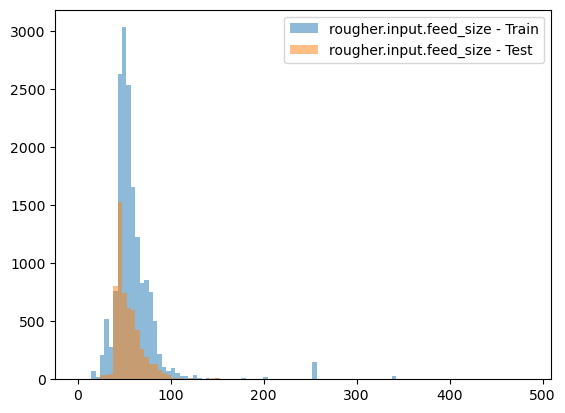

In [29]:
plt.hist(train['rougher.input.feed_size'], bins=100, alpha=0.5, label='rougher.input.feed_size - Train')
#mwmbuat grafik histogram untuk feed size pada set train
plt.hist(test['rougher.input.feed_size'], bins=100, alpha=0.5, label='rougher.input.feed_size - Test')
#mwmbuat grafik histogram untuk feed size pada set test
plt.legend(loc='upper right')#memberikan legend pada diagram grafik
plt.show()#menampilkan grafik

Kita dapat menyimpulkan bahwa distribusinya serupa dan hal ini merupakan kondisi yang baik terlepas dari perbedaan minor yang ada.

### Total konsentrat seluruh logam di setiap stage yang berbeda <a name="analysis_3"></a>

**Step 3.5**
Menghitung dan mengelompokkan konsentrat dari seluruh substansi pada setiap stage. 

In [30]:
input_concentrate = ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb'\
                              , 'rougher.input.feed_sol']
#konsentrat input
rougher_concentrate = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag'\
                                , 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']
#konsentrat rougher
output_concentrate = ['final.output.concentrate_au', 'final.output.concentrate_ag'\
                               , 'final.output.concentrate_pb', 'final.output.concentrate_sol']
#konsentrat final

#rekapitulasi nilai konsentrat
input_sum=full[input_concentrate].sum(axis=1).reset_index()
rougher_sum=full[rougher_concentrate].sum(axis=1).reset_index()
output_sum=full[output_concentrate].sum(axis=1).reset_index()

**Step 3.6**
Membuat grafik dari pengelompokan Konsentrat Input. 

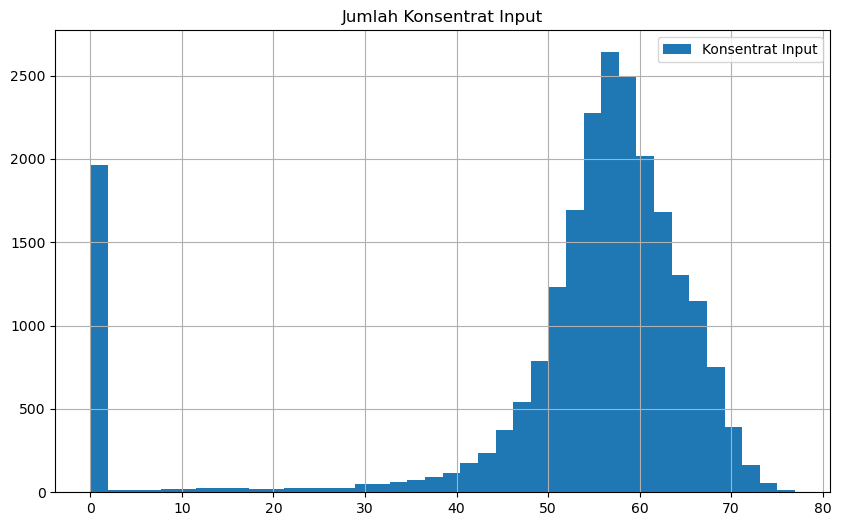

In [31]:
input_sum.hist(bins=40, label='Konsentrat Input', figsize=(10, 6))
plt.title('Jumlah Konsentrat Input')
plt.legend(loc='upper right')
plt.show()

Terdapat konsentrat dengan nilai nol di mana hal ini tidak normal.

**Step 3.7**
Membuat grafik dari pengelompokan Konsentrat Rougher. 

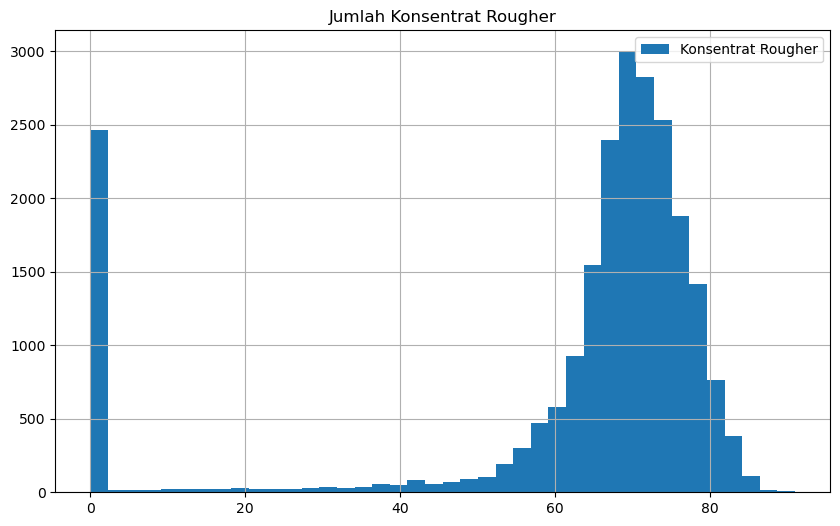

In [32]:
rougher_sum.hist(bins=40, label='Konsentrat Rougher', figsize=(10, 6))
plt.title('Jumlah Konsentrat Rougher')
plt.legend(loc='upper right')
plt.show()

Di sini juga ditemukan konsentrat dengan nilai nol di mana hal ini tidak normal.

**Step 3.8**
Membuat grafik dari pengelompokan Konsentrat Output. 

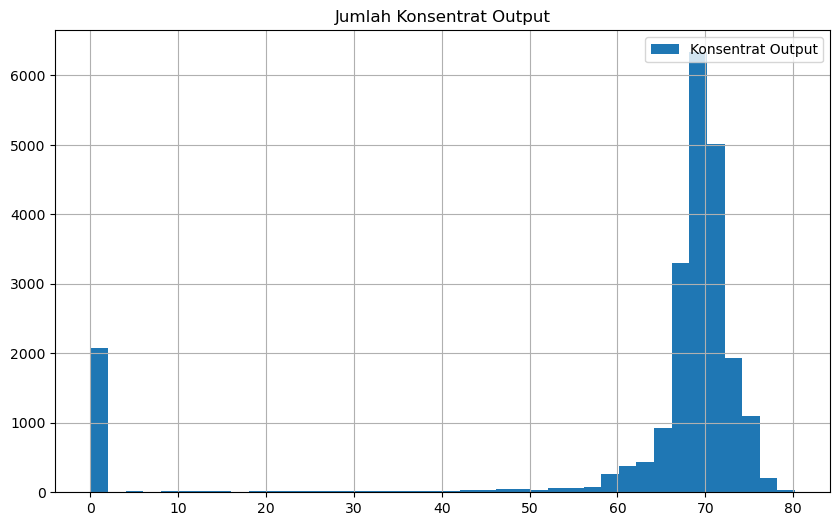

In [33]:
output_sum.hist(bins=40, label='Konsentrat Output', figsize=(10, 6))
plt.title('Jumlah Konsentrat Output')
plt.legend(loc='upper right')
plt.show()

Di sini kembali ditemukan konsentrat dengan nilai nol di mana hal ini juga menunjukkan hal yang tidak normal.

**Step 3.9**
Menindaklanjuti nilai nol pada set train yang menunjukkan data yang tidak normal.

In [34]:
#jumlah konsentrat tiap stage harus lebih besar dari 0
train_model=train[train[rougher_concentrate].sum(axis=1)>0]
train_model=train[train[output_concentrate].sum(axis=1)>0]
train_model=train[train[input_concentrate].sum(axis=1)>0]
train_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15628 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         15628 non-null  float64
 1   final.output.concentrate_au                         15628 non-null  float64
 2   final.output.concentrate_pb                         15628 non-null  float64
 3   final.output.concentrate_sol                        15628 non-null  float64
 4   final.output.recovery                               15628 non-null  float64
 5   final.output.tail_ag                                15628 non-null  float64
 6   final.output.tail_au                                15628 non-null  float64
 7   final.output.tail_pb                                15628 non-null  float64
 8   final.output.tail_sol                            

**Step 3.10**
Mengidentifikasi target dan feature pada set train

In [35]:
#menetapkan target dari set train
train_targets = train_model[['rougher.output.recovery', 'final.output.recovery']]
train_targets.shape

(15628, 2)

In [36]:
#menetapkan feature dari set train
train_features = train_model.loc[:, list(train.columns)]
train_features.shape

(15628, 86)

### Menangani outlier <a name="analysis_4"></a>

**Step 3.11**
Menindaklanjuti nilai nol pada set test yang menunjukkan data yang tidak normal. 

In [37]:
#jumlah konsentrat tiap stage harus lebih besar dari 0
test_model=test[test[rougher_concentrate].sum(axis=1)>0]
test_model=test[test[input_concentrate].sum(axis=1)>0]
test_model=test[test[output_concentrate].sum(axis=1)>0]
test_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5498 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         5498 non-null   float64
 1   final.output.concentrate_au                         5498 non-null   float64
 2   final.output.concentrate_pb                         5498 non-null   float64
 3   final.output.concentrate_sol                        5498 non-null   float64
 4   final.output.recovery                               5498 non-null   float64
 5   final.output.tail_ag                                5498 non-null   float64
 6   final.output.tail_au                                5498 non-null   float64
 7   final.output.tail_pb                                5498 non-null   float64
 8   final.output.tail_sol                             

**Step 3.12**
Menetapkan target dan feature pada set test

In [38]:
#menetapkan target dari set test
test_targets = test_model[['rougher.output.recovery', 'final.output.recovery']]
test_targets.shape

(5498, 2)

In [39]:
#menetapkan feature dari set train
test_features = test_model.loc[:, list(test.columns)]
test_features.shape

(5498, 86)

### Kesimpulan <a name="analysis_conclusion"></a>

Kita telah berhasil menganalisis konsentrat logam di seluruh stage, distribusi ukuran partikel feed, dan konsentrat total di setiap stage yang berbeda, serta kita juga telah mengeliminasi outlier.

[Kembali ke Daftar Isi](#back)

## Tahap 4. Pengujian <a name='test'></a>

**Step 4.1**
Membuat fungsi sMAPE sesuai dengan rumus yang diberikan pada deskripsi proyek, setelah itu kita akan menjadikannya sebagai metrik yang akan kita gunakan untuk memilih model terbaik. Karena ini adalah penghitungan persentase kesalahan, semakin dekat nilainya ke 0 berarti semakin baik.

In [40]:
def finalsMAPE(targ, pred): #membuat fungsi finalSMAPE yang menjadikan target dan prediction sebagai argument
    sMAPE_rougher = (np.mean((np.abs(targ.iloc[:,0] - pred[:, 0]) / ((np.abs(targ.iloc[:,0]) + np.abs(pred[:,0])) / 2))) * 100)
    #rumus sMAPE untuk stage rougher
    sMAPE_final = (np.mean((np.abs(targ.iloc[:,1] - pred[:, 1]) / ((np.abs(targ.iloc[:,1]) + np.abs(pred[:,1])) / 2))) * 100)
    #rumus sMAPE untuk stage final
    final_sMAPE = sMAPE_rougher * 0.25 + sMAPE_final * 0.75 
    #rumus sMAPE final
    return final_sMAPE
    #mengembalikan nilai sMAPE final

sMAPE_score = make_scorer(finalsMAPE, greater_is_better = False)
#membuat rumus finalsMAPE pengukur dari model, semakin kecil nilainya semakin baik karena berfungsi sebagai pengukur kesalahan

### Melakukan train model <a name="test_1"></a>

**Step 4.2**
Melakukan train model Linear Regression dan mendapatkan nilai rata-rata LR. 

In [41]:
LR = LinearRegression()
LR_score = cross_val_score(LR, train_features, train_targets, scoring=sMAPE_score, cv=5)
#menghitung nilai model Linear Regression dengan feature train dan taret train, dengan parameter scoring menggunakan sMAPE, dan cv bernilai 5)
print(LR_score.mean()) 
#mencetak nilai rata-rata LR

-2.178758797221983


**Step 4.3**
Melakukan train model Decision Tree dan mencari max-depth terbaik. 

In [42]:
for depth in range(1,11):#loop melalui max_depth dengan nilai 1 hingga 10
    DTR = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    DTR_score = cross_val_score(DTR, train_features, train_targets, scoring=sMAPE_score, cv=5)
    print('Max_Depth=', depth, ':', DTR_score.mean())

Max_Depth= 1 : -13.453443640416662
Max_Depth= 2 : -11.08187484555808
Max_Depth= 3 : -9.29097680153205
Max_Depth= 4 : -7.296640111401436
Max_Depth= 5 : -5.787867833859595
Max_Depth= 6 : -4.672377802115067
Max_Depth= 7 : -3.7378324417224342
Max_Depth= 8 : -2.9474137807268357
Max_Depth= 9 : -2.3136827173754404
Max_Depth= 10 : -1.6973890671164231


**Step 4.4**
Melakukan train model Random Forest dan mencari max_depth dan n_estimator terbaik

In [43]:
for depth in range(1, 11):
    RFR = RandomForestRegressor(n_estimators=20, max_depth=depth, random_state = 12345)
    RFR_score = cross_val_score(RFR, train_features, train_targets, scoring=sMAPE_score, cv=5)
    print('Max_Depth=', depth, ':', RFR_score.mean())

Max_Depth= 1 : -13.433089725176814
Max_Depth= 2 : -10.534423606265548
Max_Depth= 3 : -8.408300284884472
Max_Depth= 4 : -6.696302778687686
Max_Depth= 5 : -5.263849357603295
Max_Depth= 6 : -4.276338959224903
Max_Depth= 7 : -3.3000706358960494
Max_Depth= 8 : -2.7073239137201854
Max_Depth= 9 : -2.3729045932745905
Max_Depth= 10 : -2.24959968823437


Dari semua model ini, yang bekerja paling baik adalah model Decision Tree dengan hyperparameter max_depth= 10. Sekarang kita lanjutkan train model dengan Standard Scaler, lalu mengujinya di set test.

**Step 4.5**
Melakukan train model dengan Standard Scaler

In [44]:
scaler = StandardScaler()#membuat method scaler untuk menjalankan StandardScaler
scaler.fit_transform(train_features)#fit transform dengan feature train
scaler.transform(test_features)#transform dengan feature test

array([[ 1.45562719, -0.14864764,  0.2923863 , ..., -0.19127671,
         1.24228614,  0.2108789 ],
       [ 1.59019691, -0.26648626,  0.33833218, ..., -0.19350948,
         0.96570854,  0.20874343],
       [ 1.4813522 , -0.15068482,  0.27547673, ..., -0.18754296,
         0.96159452,  0.19315557],
       ...,
       [-0.14398493,  0.53313437,  0.03342912, ..., -0.19133051,
        -1.66528696,  0.24813528],
       [-0.31972806,  0.6283934 , -0.10460961, ..., -0.18949791,
        -1.66026351,  0.20224436],
       [-0.24426761,  0.57218231, -0.12891386, ..., -0.19664072,
        -1.66420524,  0.19039214]])

### Melakukan pengujian final <a name="test_2"></a>

**Step 4.6**
Melakukan pengujian terakhir dan menghitung nilai finalsMAPE

In [45]:
model = DecisionTreeRegressor(max_depth=10, random_state = 12345)
#membuat model regresi Decision Tree dengan hyperparameter max_depth 10
model.fit(train_features, train_targets)#train model dengan feature dan target yang telah diskalakan
predictions = model.predict(test_features)#menghitung prediction dengan feature test 
print(finalsMAPE(test_targets, predictions))#mencetak nilai sMAPE final 

0.9830331833611263


## Temuan <a name="end"></a>
Kita telah berhasil melakukan hal sebagai berikut:
- Menganalisis konsentrat logam melalui stage pemurnian yang berbeda dan menemukan bahwa konsentrat timbal paling tinggi pada stage rougher, diikuti oleh stage final, kemudian stage primary cleaner, dan stage input. Konsentrat perak lebih tinggi pada stage final, diikuti oleh stage rougher, stage primary cleaner, dan stage input. Konsentrat emas terus meningkat secara stabil dari satu stage ke stage lainnya, sama dengan total konsentratnya
- Menganalisis distribusi ukuran partikel feed untuk set train dan set test serta menemukan bahwa keduanya serupa
- Menguji model dan memilih model terbaik yaitu Decision Tree Regressor dengan max depth 10 yang memiliki nilai Final sMAPE sebesar 0.98%

[Kembali ke Daftar Isi](#back)